In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve


In [3]:
print("Step 1: Loading and Preparing Data")

Step 1: Loading and Preparing Data


In [5]:

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [6]:
df['target'] = cancer.target

print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nTarget Value Counts:")
print(df['target'].value_counts())
print("-" * 50)


Dataset Head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \


In [7]:
print("\nStep 2: Splitting Data and Standardizing Features")
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Step 2: Splitting Data and Standardizing Features
Training set shape: (455, 30)
Testing set shape: (114, 30)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features have been standardized.")
print("-" * 50)

Features have been standardized.
--------------------------------------------------


In [11]:
print("\nStep 3: Training the Logistic Regression Model")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Logistic Regression model trained successfully.")
print("-" * 50)


Step 3: Training the Logistic Regression Model
Logistic Regression model trained successfully.
--------------------------------------------------


In [12]:
print("\nStep 4: Evaluating the Model")

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
# Get prediction probabilities for the positive class (1)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# a) Confusion Matrix
print("\na) Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Step 4: Evaluating the Model

a) Confusion Matrix:
[[41  1]
 [ 1 71]]


Confusion matrix plot saved as 'confusion_matrix.png'


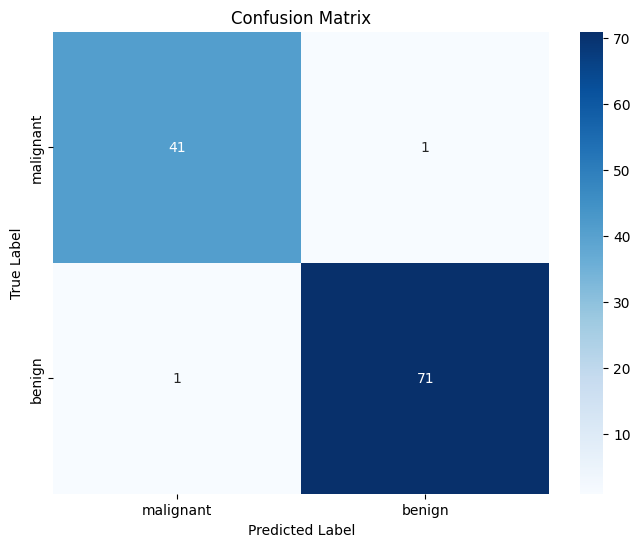

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("Confusion matrix plot saved as 'confusion_matrix.png'")

In [14]:
print("\nb) Classification Report (Precision, Recall, etc.):")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


b) Classification Report (Precision, Recall, etc.):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [15]:
print("\nc) ROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"The ROC-AUC score is: {roc_auc:.4f}")


c) ROC-AUC Score:
The ROC-AUC score is: 0.9954


ROC curve plot saved as 'roc_curve.png'
--------------------------------------------------


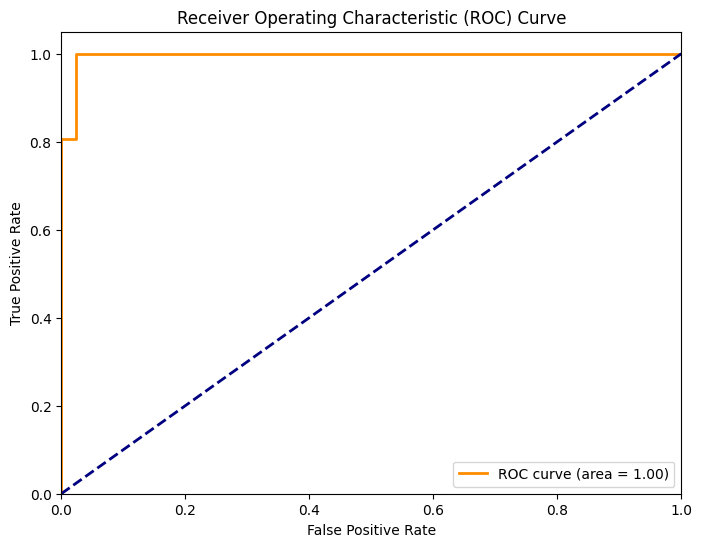

In [17]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
print("ROC curve plot saved as 'roc_curve.png'")
print("-" * 50)


d) Precision-Recall Curve:
Precision-Recall curve plot saved as 'precision_recall_curve.png'
--------------------------------------------------


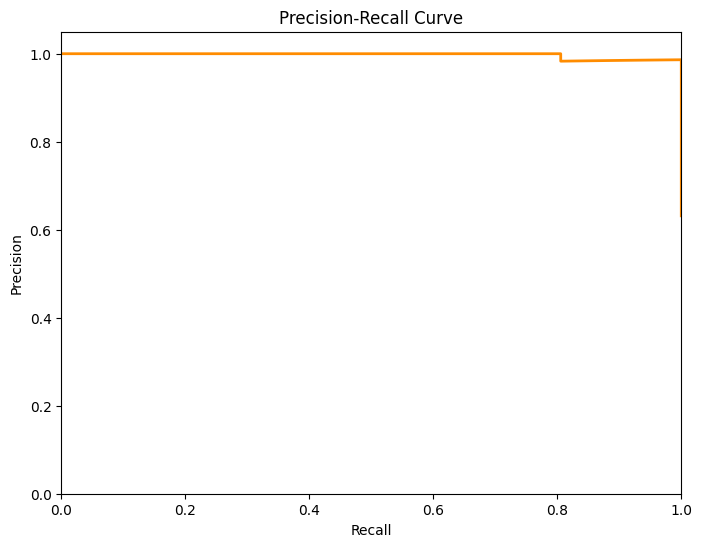

In [18]:
print("\nd) Precision-Recall Curve:")
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.savefig('precision_recall_curve.png')
print("Precision-Recall curve plot saved as 'precision_recall_curve.png'")
print("-" * 50)

In [19]:
print("\nStep 5: Threshold Tuning")

# The default threshold is 0.5. Let's see what happens if we change it.
# For example, let's set a new threshold of 0.7
new_threshold = 0.7
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

print(f"\nClassification Report with Threshold = {new_threshold}:")
print(classification_report(y_test, y_pred_new_threshold, target_names=cancer.target_names))
print("Notice how changing the threshold affects precision and recall.")
print("A higher threshold makes the model more 'cautious' about predicting the positive class (benign), leading to higher precision but lower recall for that class.")



Step 5: Threshold Tuning

Classification Report with Threshold = 0.7:
              precision    recall  f1-score   support

   malignant       0.89      0.98      0.93        42
      benign       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Notice how changing the threshold affects precision and recall.
A higher threshold makes the model more 'cautious' about predicting the positive class (benign), leading to higher precision but lower recall for that class.



Sigmoid function plot saved as 'sigmoid_function.png'
The sigmoid function maps any real-valued number into a value between 0 and 1, which is interpreted as a probability.

--- Task Complete ---


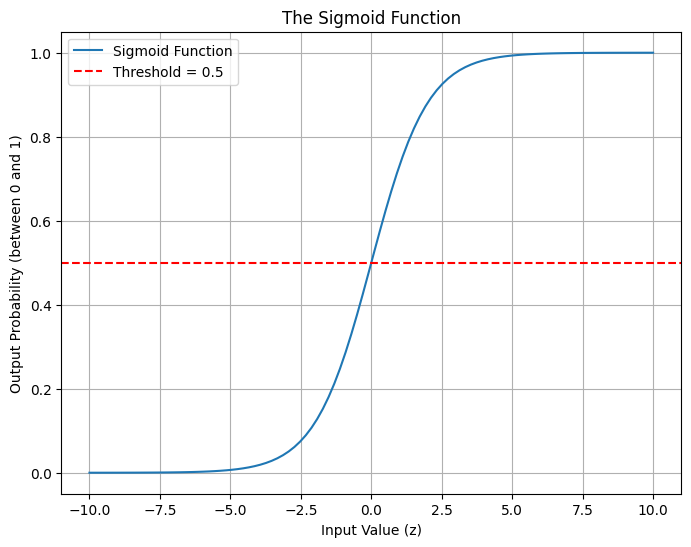

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Sigmoid Function')
plt.title('The Sigmoid Function')
plt.xlabel('Input Value (z)')
plt.ylabel('Output Probability (between 0 and 1)')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.savefig('sigmoid_function.png')
print("\nSigmoid function plot saved as 'sigmoid_function.png'")
print("The sigmoid function maps any real-valued number into a value between 0 and 1, which is interpreted as a probability.")

print("\n--- Task Complete ---")
